In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw

Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


Подготовим данные. 
DF A - отток True
DF B - отток False

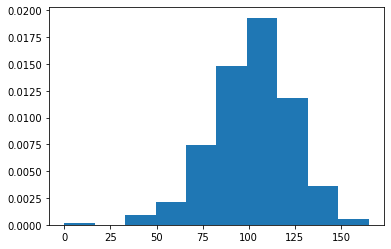

In [3]:
A = df[df['churn']==True]
plt.hist(A['total day calls'], density=True)
plt.show()

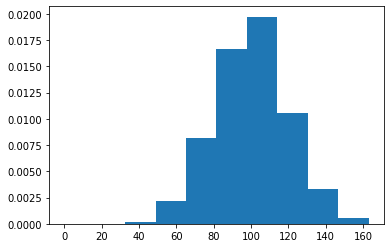

In [4]:
B = df[df['churn']==False]
plt.hist(B['total day calls'], density=True)
plt.show()

Для А и В создадим массив из выборочных средних

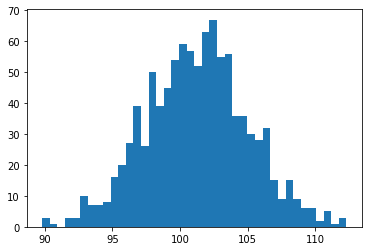

In [5]:
N = 30
n = 1000
data_A = []
for i in range(n):
    data_A.append(np.mean(A['total day calls'].sample(N)))
data_A = np.array(data_A).astype(np.float32)
plt.hist(data_A, bins=40)
plt.show()
    

In [6]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_A), np.std(data_A, ddof=1), alpha=0.95, alternative='two-sided')))

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data_A) - 2 * data_A.std() / np.sqrt(n-1), np.mean(data_A) + 2 * data_A.std() / np.sqrt(n-1))) 

Доверительный интервал для среднего по цпт методом _zconfint_generic: (101.01592195752956, 101.49120389696263) 
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [101.01388015754564, 101.49324569694654] 


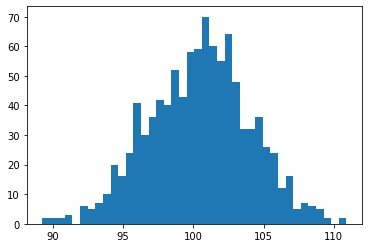

In [7]:
data_B = []
for i in range(n):
    data_B.append(np.mean(B['total day calls'].sample(N)))
data_B = np.array(data_B).astype(np.float32)
plt.hist(data_B, bins=40)
plt.show()

In [8]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_B), np.std(data_B, ddof=1), alpha=0.95, alternative='two-sided')))

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data_B) - 2 * data_B.std() / np.sqrt(n-1), np.mean(data_B) + 2 * data_B.std() / np.sqrt(n-1))) 

Доверительный интервал для среднего по цпт методом _zconfint_generic: (100.218956343048, 100.67023433078012) 
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [100.21701765611179, 100.67217301771633] 


Оба метода дали идентичный доверительный интервал